# Search Engine Keyword Analysis


## Introduction
In this analysis, we explore a dataset of keywords ranked by their search frequency across various search engines. The focus is to find the number of searches the top-ranked keyword receives in each search engine, offering insights into search engine dynamics and keyword popularity. This Python notebook will guide you through the process of exploratory data analysis, employing various analytical and visualization techniques to effectively interpret the data, and insightful conclusions that offer a deeper understanding of the data.

## Objective
The primary objective of this analysis is to determine the number of searches received by the top-ranked keyword (rank 1) for each search engine. This study aims to reveal insights into the search volume distribution and user search preferences across different search engines.

## Data Loading

In [ ]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.precision", 2)

# Load the data
# Note: Please replace '/case_study_junior_ds.csv' with the file path where your dataset is stored.
data = pd.read_csv('/case_study_junior_ds.csv')

##Exploratory Data Analysis (EDA)

In [108]:
def explore_data(df):
    """
    Perform initial data exploration on the given DataFrame.

    Parameters:
    df (pandas.DataFrame): DataFrame to explore.

    Returns:
    None
    """
    # Display the first few rows of the DataFrame
    print("First few rows of the DataFrame:")
    print(df.head())
    print("\n")

    # Display descriptive statistics
    print("Descriptive Statistics:")
    print(df.describe())
    print("\n")

    # Display information about the DataFrame
    print("DataFrame Information:")
    print(df.info())
    print("\n")

    # Display the number of missing values in each column
    print("Missing Values in Each Column:")
    print(df.isnull().sum())
    print("\n")

    # Display the shape of the DataFrame
    print(f"The shape of the DataFrame is: {df.shape}")
    print("\n")

    # Code to create a summary of the data file
    data_summary = {
        'Date Range': [data['date'].min(), data['date'].max()],
        'Unique Keywords': data['keyword_id'].nunique(),
        'Unique Ranks': data['keyword_rank'].nunique(),
        'Unique Search Engines': data['search_engine'].nunique(),
        'Total Searches': data['searches'].sum(),
    }
    print(data_summary)
    print("\n")

    #checking duplicate keyword_rank values for each date date
    duplicate_counts_per_date = df.groupby('date')['keyword_rank'].apply(lambda x: x.duplicated().sum())
    duplicate_counts_per_date.columns = ['Date', 'Count of Duplicate Keyword Rank']
    print("Count of duplicate keyword ranks for each date")
    print(duplicate_counts_per_date)
    print("\n")

    # Code to analyze if there are common keyword_ids across different search engines
    keywords_by_engine = data.groupby('keyword_id')['search_engine'].unique()
    common_keywords = keywords_by_engine[keywords_by_engine.apply(len) > 1]
    print("common keyword_ids across different search engines")
    print(common_keywords)

explore_data(data)

First few rows of the DataFrame:
    keyword_id  keyword_rank       date  searches search_engine
0       338145         25218 2022-07-08     53000             0
1       366846        906743 2022-07-08         0             0
2   8590017696        136761 2022-07-08      7000             0
3   8590268435         60380 2022-07-08     20033             0
4  17179954797        239930 2022-07-08      2000             0


Descriptive Statistics:
       keyword_rank  searches
count      4.69e+05  4.69e+05
mean       7.44e+05  8.55e+03
std        1.39e+06  8.28e+04
min        3.00e+00  0.00e+00
25%        7.42e+04  0.00e+00
50%        2.36e+05  0.00e+00
75%        7.82e+05  3.00e+03
max        1.39e+07  1.86e+07


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469308 entries, 0 to 469307
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   keyword_id     469308 non-null  category   

#Observations about the Data
The dataset provided for analysis contains information on keyword searches across different search engines. It is organized into five columns: keyword_id, keyword_rank, date, searches, and search_engine. Below is a detailed breakdown of our initial observations:

##Data Types and Structure

###Numerical Variables:
keyword_rank: Represents the rank of keywords based on search frequency.
searches: The number of searches for the keyword.
search_engine: An identifier for different search engines.
###Categorical/String Variables:
keyword_id: A unique identifier for each keyword.
date: The date of the data record, formatted as YYYY-MM-DD.

###Anomalies or Missing Values
Initial review did not reveal any missing values or anomalies.
#####Note: This is based on a preliminary analysis.

###Initial Insights
1. The dataset tracks the frequency of keyword searches over time across various search engines.
keyword_rank indicates a ranking system for keywords, which could provide insights into search trends and keyword popularity.

2. After grouping the data by unique dates, it was observed that there are a significant number of duplicate keyword_rank entries within each group.
This suggests that keyword_rank is not unique across the entire dataset but is instead recalculated for each search engine on a daily basis.

###Implication for Analysis
When analyzing the dataset, it is important to consider the search engine in conjunction with the keyword rank to get accurate insights.

## Data Preprocessing

In [109]:
def prepare_data(df):
    """
    Prepare the dataset by converting columns to appropriate data types and performing necessary transformations.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the dataset to be prepared.

    Returns:
    DataFrame: The prepared DataFrame with columns in correct data types.
    """
    # Convert 'date' from string to datetime object
    df['date'] = pd.to_datetime(df['date'])

    # Ensure 'keyword_id' is treated as a categorical variable
    df['keyword_id'] = df['keyword_id'].astype('category')

    # Ensure 'search_engine' is treated as a categorical variable
    df['search_engine'] = df['search_engine'].astype('category')

prepare_data(data)

##Data Correlation

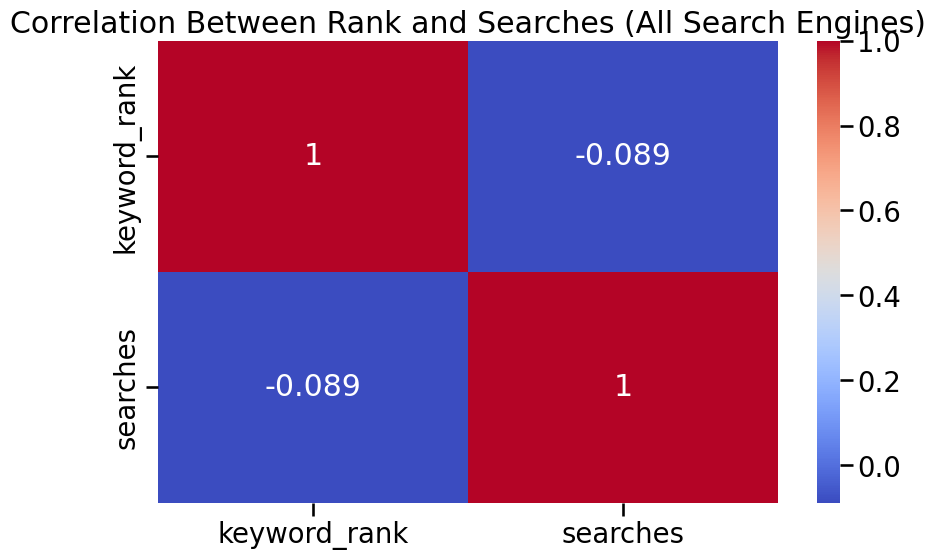

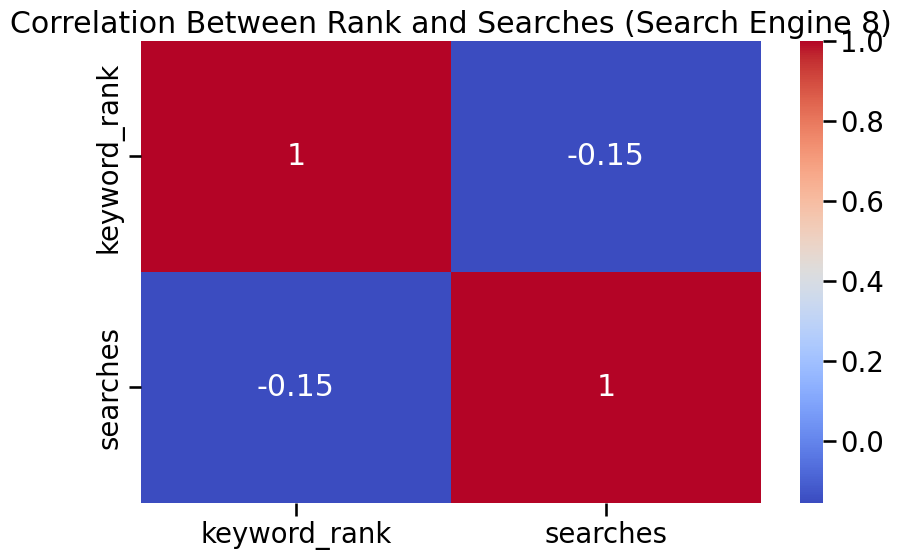

In [110]:
def check_correlation(df, specific_date, specific_engine):
    """
    Check and visualize the correlation between keyword rank and number of searches.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the dataset.
    specific_date (str): The specific date to filter the dataset.
    specific_engine (int): The specific search engine ID to filter the dataset.

    Returns:
    None: This function only plots the correlation matrices.
    """
    # Filter the DataFrame for the specific date
    df_date = df[df['date'] == specific_date]

    # Correlation plot for the entire dataset (filtered by date)
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_date[['keyword_rank', 'searches']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Between Rank and Searches (All Search Engines)')
    plt.show()

    # Filter the DataFrame for the specific date and search engine
    df_date_engine = df_date[df_date['search_engine'] == specific_engine]

    # Correlation plot for the dataset filtered by date and search engine
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_date_engine[['keyword_rank', 'searches']].corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Between Rank and Searches (Search Engine {specific_engine})')
    plt.show()

check_correlation(data, '2022-07-08', 8)

##Correlation Insights:
####All Search EnginesCorrelation Between Rank and Searches (All Search Engines):
A very weak negative relationship between keyword rank and searches, suggesting search volume  is not a strong predictor of rank across all search engines.
####Correlation Between Rank and Searches (Search Engine 8):
A slightly stronger negative correlation suggests that for every Search Engine, higher-ranked keywords may be searched slightly more frequently, but the relationship is not very strong.
####General Observation:
The correlations suggest that other factors likely influence the keyword rank.

##Analysis and Visualization

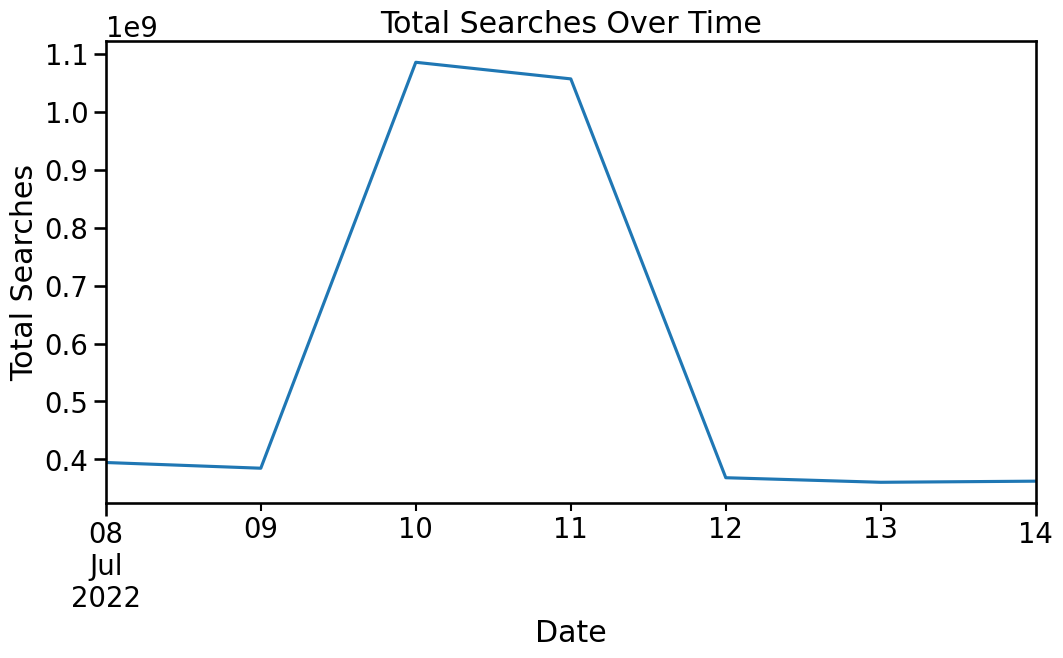

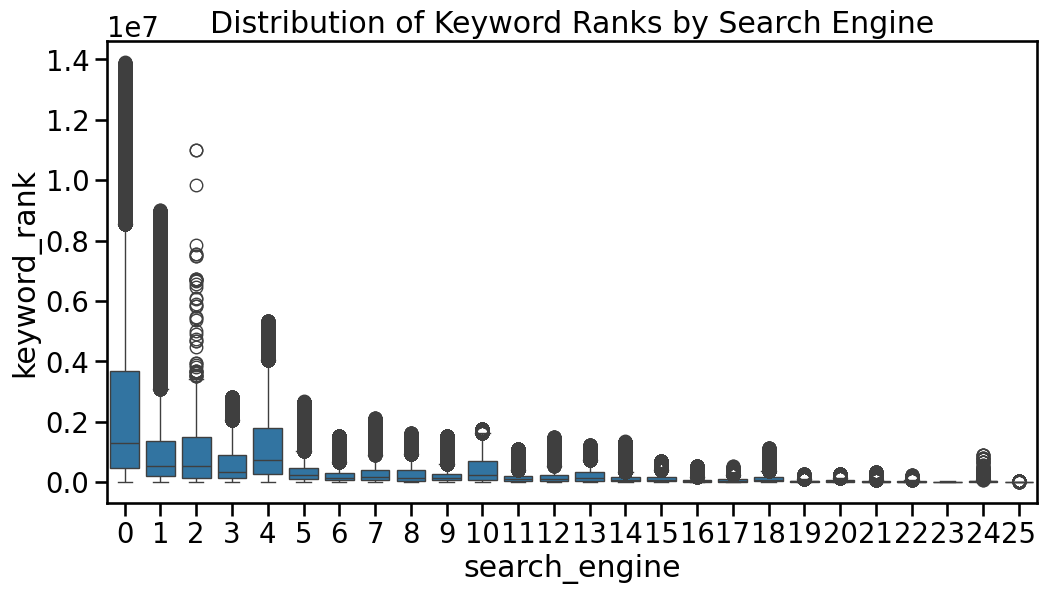

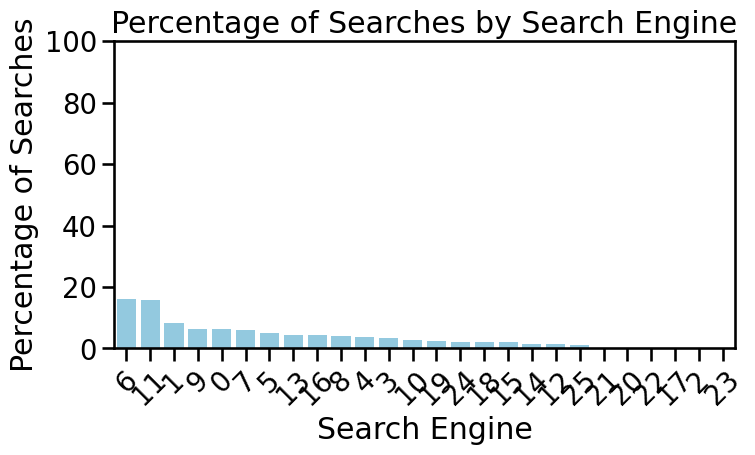



Searches for Rank 1 Keywords by Search Engine:




In [111]:
def analyze_and_visualize_data(df):
    """
    Perform data analysis and visualization on the search engine data.

    Parameters:
    df (pandas.DataFrame): The dataframe containing search engine data.

    """

    # Temporal Analysis: Trends of searches over time
    searches_over_time = df.groupby('date')['searches'].sum()
    plt.figure(figsize=(12, 6))
    searches_over_time.plot(kind='line', title='Total Searches Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Searches')
    plt.show()
    print("\n")

    # Visualize the distribution of ranks for each search engine using boxplots
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='search_engine', y='keyword_rank', data=df)
    plt.title('Distribution of Keyword Ranks by Search Engine')
    plt.show()
    print("\n")

    # Calculate total searches by engine and overall total
    total_searches_by_engine = df.groupby('search_engine')['searches'].sum()
    total_searches = total_searches_by_engine.sum()

    # Calculate percentage
    percentage_searches_by_engine = (total_searches_by_engine / total_searches) * 100

    # Create a DataFrame for visualization
    percentage_df = pd.DataFrame({'Search Engine': percentage_searches_by_engine.index,
                                  'Percentage of Searches': percentage_searches_by_engine.values})

    # Sort the DataFrame by percentage in decreasing order
    percentage_df_sorted = percentage_df.sort_values(by='Percentage of Searches', ascending=False)

    # Explicitly define the order for the barplot
    order = percentage_df_sorted['Search Engine']

    # Plot the percentages
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Search Engine', y='Percentage of Searches',
                data=percentage_df_sorted, order=order, color='skyblue')
    plt.title('Percentage of Searches by Search Engine')
    plt.xlabel('Search Engine')
    plt.ylabel('Percentage of Searches')
    plt.ylim(0, 100)  # Set the y-axis limit to 0-100
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()
    print("\n")

    # Calculate the number of searches for rank 1 keyword
    rank_1_searches = df[df['keyword_rank'] == 1].groupby('search_engine')['searches'].sum()
    print("Searches for Rank 1 Keywords by Search Engine:")
    #print(rank_1_searches)
    print("\n")

analyze_and_visualize_data(data)

##Approach to Identifying Top-Ranked Keywords
###Initial Attempt:
####Action:
Searched records where keyword_rank == 1.
####Finding:
No such records were present, indicating the highest rank might not be labeled as '1' or could be absent from the dataset.
###Adapted Strategy:
####Method:
Identified the lowest keyword_rank for each search engine, assuming this represents the most popular or top-ranked keyword.
####Observation:
This method successfully identified the top-ranked keywords as per the dataset's structure.
###Analysis of Search Volumes
####Summation of Searches:
#####Process: Aggregated the search data by search_engine, summing up the searches to quantify the total searches for each engine's top keyword.
#####Purpose: This aggregation provided a clear picture of the popularity and search volume associated with the top keywords in each search engine.
####Temporal Search Analysis:
#####Approach: Grouped the dataset by search_engine and date to understand the temporal variation in searches for the top keywords.
#####Rationale: This temporal analysis was crucial to find patterns or trends over time, offering deeper insights into the search behaviors.
###Justification of Methods:
#####Reasoning: These methods were chosen to align with the project's objectives, effectively adapting to the dataset and constraints.
#####Outcome: The approach provided comprehensive insights into the search volume distribution and temporal trends, adhering to the initial task requirements.

Total Searches for Top Keyword per Search Engine:
   search_engine  searches     keyword_id
13            13  27216147  1554778255514
1              1   7419497   704374905883
7              7   5210783   369367302479
25            25   5180843  3212635610681
19            19   3814478   120259234373
24            24   3726434  3135326202085
9              9   3027210  1090922017637
11            11   2890242   910533449676
8              8   2548918  1606317975332
6              6   2210918  1073742334476
16            16   2059366   171799086383
10            10   1290403   953483220498
0              0   1252793         107796
18            18    965185   979252599951
5              5    932521   446676669250
15            15    827380  2035814640613
3              3    547986  4148938482137
4              4    488266   309238066050
14            14    257070  1133871515516
12            12    208520  1005022448993
21            21    179466  2628520089616
20            20     98677

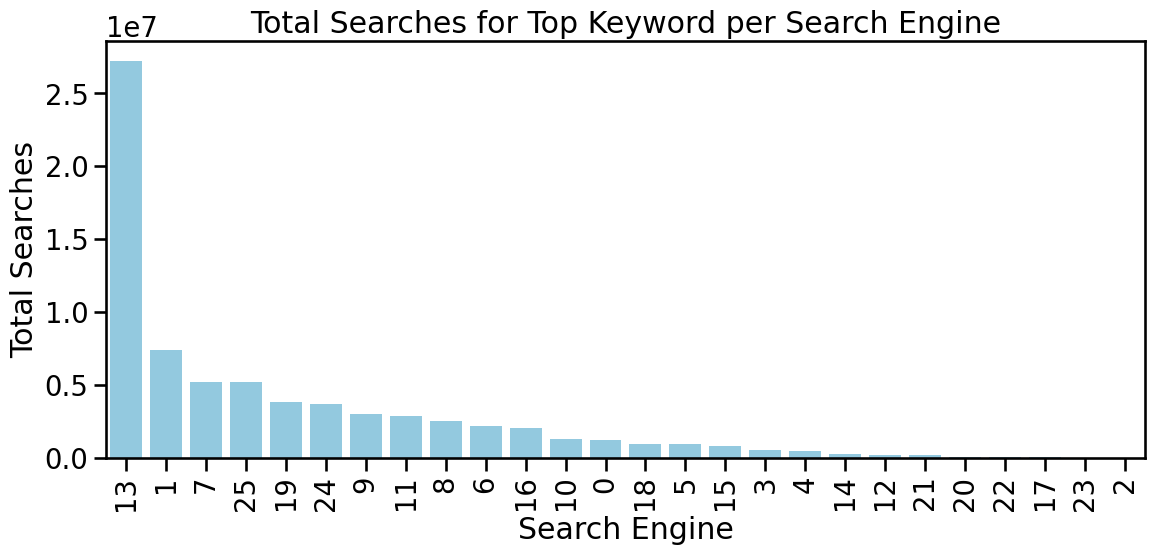

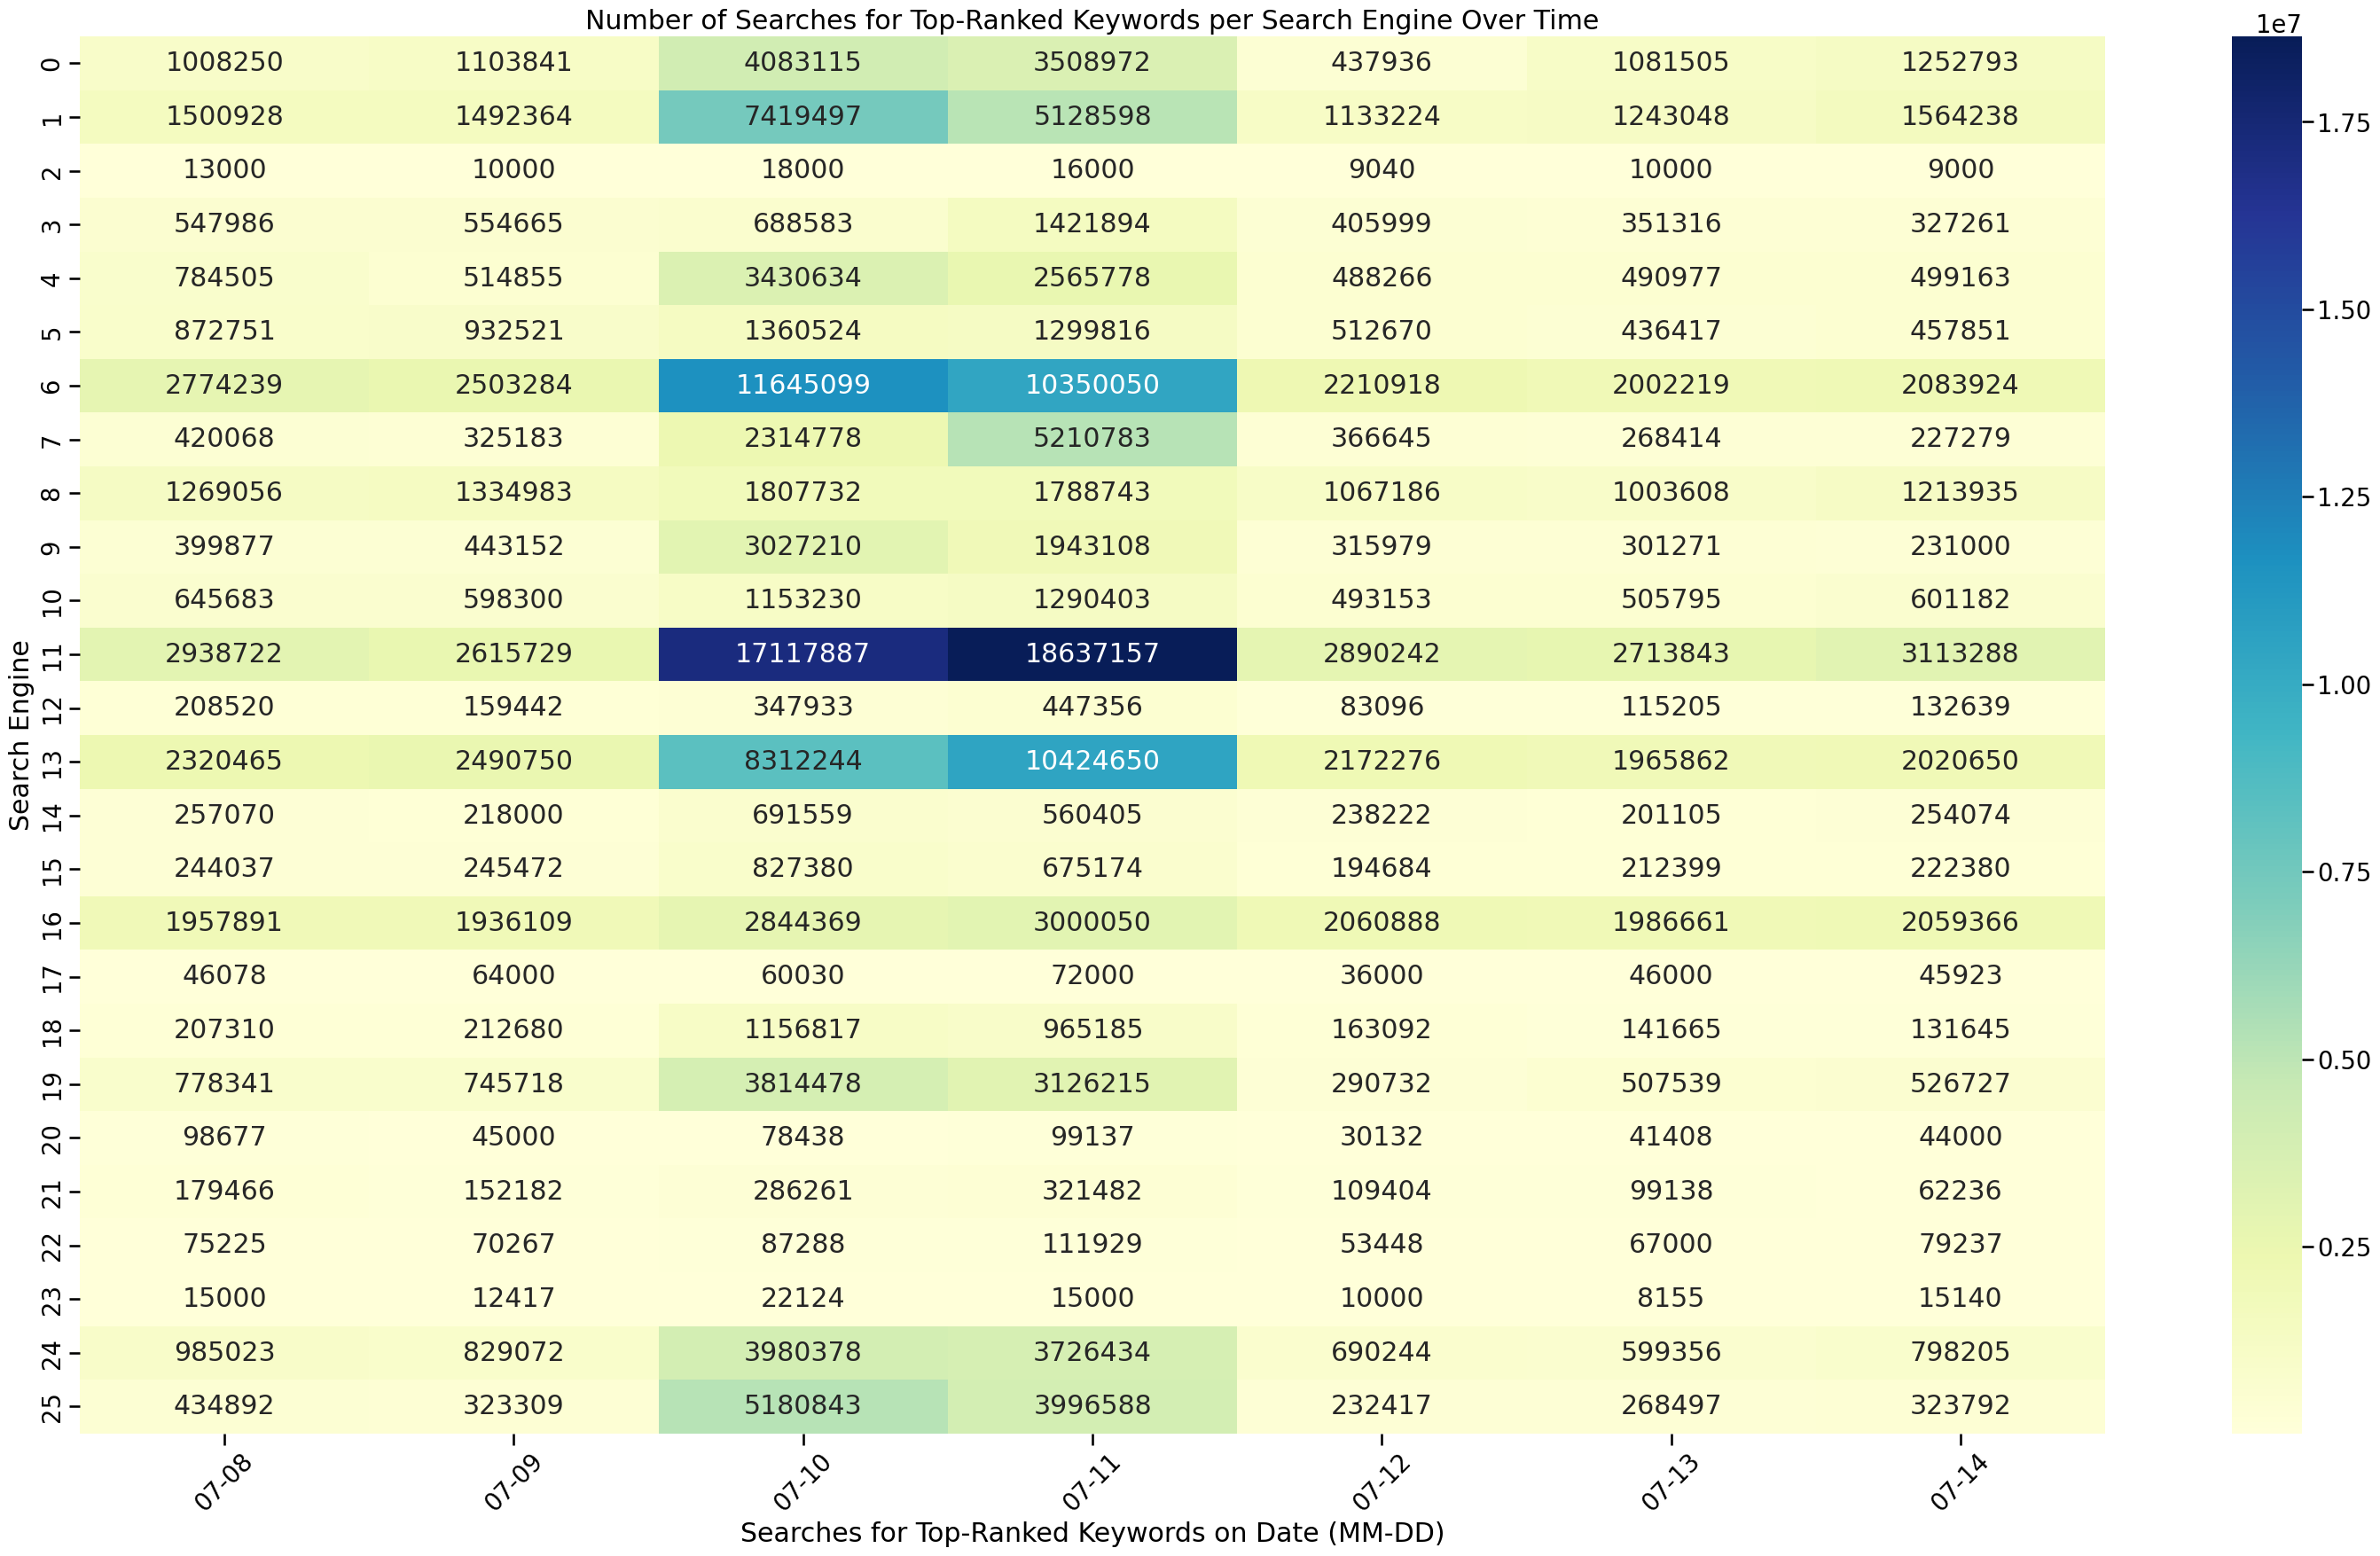



Number of Searches for Top-Ranked Keywords per Search Engine Over Time:


date,07-08,07-09,07-10,07-11,07-12,07-13,07-14
search_engine,,,,,,,
0,1008250,1103841,4083115,3508972,437936,1081505,1252793
1,1500928,1492364,7419497,5128598,1133224,1243048,1564238
2,13000,10000,18000,16000,9040,10000,9000
3,547986,554665,688583,1421894,405999,351316,327261
4,784505,514855,3430634,2565778,488266,490977,499163
5,872751,932521,1360524,1299816,512670,436417,457851
6,2774239,2503284,11645099,10350050,2210918,2002219,2083924
7,420068,325183,2314778,5210783,366645,268414,227279
8,1269056,1334983,1807732,1788743,1067186,1003608,1213935


In [112]:
def find_top_keywords(df):
    """
    Identify and analyze the top-ranked keywords for each search engine.
    It also performs temporal analysis of the number of searches for these top-ranked keywords over time.

    Parameters:
    df (pandas.DataFrame): The dataframe containing search engine data with columns 'search_engine', 'keyword_rank', 'date', and 'searches'.

    Returns:
    combined_searches_df (pandas.DataFrame): DataFrame containing the number of searches for top-ranked keywords per search engine over time.
    """

    # Identify the highest-ranked keyword for each search engine
    top_rank_per_engine = df.groupby('search_engine')['keyword_rank'].min().reset_index()

    # Retrieve the details of these top-ranked keywords from the original dataframe
    top_keywords_details = pd.merge(df, top_rank_per_engine, how='inner', on=['search_engine', 'keyword_rank'])

    # Aggregate the total searches for these top-ranked keywords by search engine
    searches_top_keyword_per_engine = top_keywords_details.groupby('search_engine').agg({'searches': 'sum', 'keyword_id': 'first'}).reset_index()

    # Sort the DataFrame by 'searches' in descending order
    searches_top_keyword_per_engine_sorted = searches_top_keyword_per_engine.sort_values(by='searches', ascending=False)

    print('Total Searches for Top Keyword per Search Engine:')
    print(searches_top_keyword_per_engine_sorted)
    print("\n")
    order = searches_top_keyword_per_engine_sorted['search_engine']

    # Plot the total searches for top keywords by search engine
    plt.figure(figsize=(12, 6))
    sns.barplot(x='search_engine', y='searches', data=searches_top_keyword_per_engine_sorted, order=order, color='skyblue')
    plt.xlabel('Search Engine')
    plt.ylabel('Total Searches')
    plt.title('Total Searches for Top Keyword per Search Engine')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    print("\n")


    # Temporal Analysis of Searches Over Time
    # Define the date range from the dataset
    min_date = df['date'].min()
    max_date = df['date'].max()

    # Function to get the details of the top-ranked keyword for each search engine on a specific date
    def get_min_rank_info(sub_df, single_date):
        sub_df_date = sub_df[sub_df['date'] == single_date]
        min_rank_df = sub_df_date.loc[sub_df_date.groupby('search_engine')['keyword_rank'].idxmin()]
        return min_rank_df[['search_engine', 'keyword_id', 'searches']].set_index('search_engine')

    # Initialize a list to store the minimum rank information for each date
    combined_min_rank_list = []

    # Loop through each date, get the minimum rank info, and add it to the list
    for single_date in pd.date_range(start=min_date, end=max_date):
        min_rank_info = get_min_rank_info(df, single_date)
        # Format the date to just month and day
        min_rank_info['date'] = single_date.strftime('%m-%d')
        combined_min_rank_list.append(min_rank_info)

    # Concatenate the list of DataFrames into one DataFrame
    combined_searches_df = pd.concat(combined_min_rank_list)

    # Pivot the DataFrame to have search engines as rows, dates as columns, and searches as values
    combined_searches_pivot = combined_searches_df.pivot_table(index='search_engine', columns='date', values='searches', fill_value=0)

    # Visualize the number of searches for top-ranked keywords per search engine over time using a heatmap
    plt.figure(figsize=(30, 18))
    sns.set_context("talk", font_scale=1.2)
    sns.heatmap(combined_searches_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title('Number of Searches for Top-Ranked Keywords per Search Engine Over Time')
    plt.xlabel('Searches for Top-Ranked Keywords on Date (MM-DD)')
    plt.ylabel('Search Engine')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")
    print("Number of Searches for Top-Ranked Keywords per Search Engine Over Time:")

    # Return the pivoted DataFrame for further analysis if needed
    return combined_searches_pivot

find_top_keywords(data)

###Model(s) and Evaluation

Predictive modeling was not a requirement for this task as it focused more on data aggregation and analysis, rather than on making predictions.


#Data Analysis and Visualization Conclusions

The analysis led to several key findings:

##Temporal Search Volume Trends
On the 10th and 11th of July, there was a significant surge in search volumes, likely due to a major event or marketing initiative. This surge was short-lived, as evidenced by the sharp decline that followed, suggesting it was an isolated event rather than a lasting shift in user search behavior.

##Search Engine Keyword Rank Distribution
Different search engines show varied distributions in keyword ranks. While some search engines have a wide distribution of ranks, indicating a broad range of search interests, others show more concentrated rank distributions, which could signal a more targeted search focus.

##Market Share of Search Volumes
A small number of search engines like  6 and 11 capturing a large portion of the total search volumes, revealing a market dominated by a few key search engines. This highlights user preference for certain search engines and potentially points to the effectiveness of their search algorithms and user engagement strategies.

##Insights on Top-Ranked Keywords
No keywords hold the number one rank, hence the analysis focused on keywords with high ranks to deduce the search volumes they get across various search engines. The difference in search volumes for these top-ranked keywords suggests the popularity of certain topics.

##Variability Across Search Engines
The ranks of keywords differ notably across search engines, which could be attributed to the unique algorithms each search engine uses.

##Search Behavior Over Time
The heatmap showcases variable search behavior over time, with notable spikes on specific dates. This fluctuation in search activity may align with external events, marketing campaigns, or seasonal trends that influence search behavior.